Series

In [1]:
import pandas as pd
import numpy as np
list_1 = ["a","b","c","d"]
labels = [1,2,3,4]
ser_1 = pd.Series(data = list_1,index = labels)

In [2]:
ser_1

1    a
2    b
3    c
4    d
dtype: object

In [3]:
arr_1 = np.arange(0,5)
ser_2 = pd.Series(arr_1)
ser_2

0    0
1    1
2    2
3    3
4    4
dtype: int32

In [4]:
dict = {"f_name" : "Amandeep","l_name" :"python","Age":"20"}
ser_3 = pd.Series(dict)
ser_3

f_name    Amandeep
l_name      python
Age             20
dtype: object

In [5]:
ser_3["f_name"]

'Amandeep'

In [6]:
ser_3.dtype

dtype('O')

In [7]:
ser_1 + ser_3
ser_1 * ser_3
np.exp(ser_2)

0     1.000000
1     2.718282
2     7.389056
3    20.085537
4    54.598150
dtype: float64

In [8]:
ser_4 = pd.Series({6:5,5:6,6:7,7:8},name = "random numbers")
ser_4 + ser_2 #cant add or any other operation because of different indices

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
6   NaN
7   NaN
dtype: float64

Data Frames

In [9]:
#data frames are 2d data sets and series are 1d data sets
arr_2 = np.random.randint(10,50,size = (2,3))
df_1 = pd.DataFrame(arr_2,["a","b"],["c","d","e"])
df_1

,c,d,e
a,46,47,21
b,15,48,20


In [10]:
dict_3 = {'one':pd.Series([1,2,3],index=["a","b","c"]),
          'two':pd.Series([4,5,6,7],index = ["a","b","c","d"])}
df_2 = pd.DataFrame(dict_3)
df_2
df_2.shape

(4, 2)

Editing and Retrivig Data

In [11]:
print(df_1)
df_1["c"] #get single columns
df_1[["c","d"]] #get 2 columns
df_1.loc["a"] #loc gives specified rows
df_1.iloc[1] #iloc gives rows with indexes
df_1.loc["a","c"] # acessing specific col of a row
df_1.loc[["a","b"],["c","d"]]
df_1["Total"] = df_1["c"] + df_1["d"] #adding more columns
df_2["mult"] = df_2["one"] * df_2["two"]

    c   d   e
a  46  47  21
b  15  48  20


In [12]:
dict_5 = {'c':44,"d":45,"e":46}
new_row = pd.Series(dict_5,name = "F")
df_1 = df_1.append(new_row)
df_1

,c,d,e,Total
a,46.0,47.0,21.0,93.0
b,15.0,48.0,20.0,63.0
F,44.0,45.0,46.0,NaN


In [13]:
df_1.drop('Total',axis = 1,inplace = True) #deleting columns
df_1

,c,d,e
a,46.0,47.0,21.0
b,15.0,48.0,20.0
F,44.0,45.0,46.0


In [14]:
df_1.drop("b",axis = 0,inplace = True) #deleting rows
df_1

,c,d,e
a,46.0,47.0,21.0
F,44.0,45.0,46.0


In [15]:
df_1["Sex"] = ["Men","Women"] #setting new indices
df_1.set_index("Sex",inplace = True)
df_1

,c,d,e
Sex,,,
Men,46.0,47.0,21.0
Women,44.0,45.0,46.0


In [16]:
df_1.reset_index(inplace = True) #resetting changed indices
df_1

,Sex,c,d,e
0,Men,46.0,47.0,21.0
1,Women,44.0,45.0,46.0


In [17]:
df_2["Assign"] = df_2["one"] / df_2["two"]
df_2

,one,two,mult,Assign
a,1.0,4,4.0,0.25
b,2.0,5,10.0,0.40
c,3.0,6,18.0,0.50
d,NaN,7,NaN,NaN


In [18]:
df_2.assign(divs = lambda x: x["two"] / x["one"]) #assign new cols using lambda
df_2

,one,two,mult,Assign
a,1.0,4,4.0,0.25
b,2.0,5,10.0,0.40
c,3.0,6,18.0,0.50
d,NaN,7,NaN,NaN


In [19]:
df_3 = pd.DataFrame({"A":["1",44,4,np.nan]})# combining data frames
df_4 = pd.DataFrame({"B":["1",np.nan,5,9]})
df_3.combine_first(df_4)
df_3

,A
0,1
1,44
2,4
3,NaN


Conditional Selection

In [20]:
arr_2 = np.random.randint(10,50,size= (2,3))
df_1 = pd.DataFrame(arr_2,["a","b"],["c","d","e"])
print("Greater than 40 ",df_1 > 40) #get values greter than 40

Greater than 40         c      d      e
a   True  False  False
b  False   True   True


In [21]:
arr = df_1.gt(40.0) #get values greter than 40 using function
arr 
#slly use df_1.ge = greater than or equal to , df_1.le , df_1.lt

,c,d,e
a,True,False,False
b,False,True,True


In [22]:
bool_1 = df_1 >=45
df_1[bool_1]
df_1["e"] > 45

a    False
b    False
Name: e, dtype: bool

In [23]:
df_1[df_1["e"] > 30]

,c,d,e
b,35,49,42


In [24]:
df_2 = df_1[df_1["e"] > 30]
df_2["c"]
print(df_1[df_1["e"] > 20][["c","d"]])

    c   d
b  35  49


In [25]:
arr3 = np.array([[1,2,3],[4,5,6],[7,8,9]])
df_2 = pd.DataFrame(arr3,["a","b","c"],["d","e","f"])
print(df_2)
df_2[(df_2["d"] > 1)|(df_2["d"] <1)]


   d  e  f
a  1  2  3
b  4  5  6
c  7  8  9


,d,e,f
b,4,5,6
c,7,8,9


File input and output

In [26]:
df = pd.read_csv(r"C:\Users\amand\Desktop\cpp_practice\comp.csv")
df.to_csv("computr.csv") #saving original data copy
pd.read_excel(r"C:\Users\amand\Desktop\cpp_practice\fsale.xlsx",0)
df.to_excel(r"C:\Users\amand\Desktop\cpp_practice\computr.xlsx")
pd.read_excel(r"C:\Users\amand\Desktop\cpp_practice\computr.xlsx")

,Unnamed: 0,Sale ID,Contact,Sex,Age,State,Product ID,Product Type,Sale Price,Profit,Lead,Month,Year
0,0,1,Paul Thomas,M,43,OH,M01-F0024,Desktop,479.99,143.39,Website,January,2018
1,1,2,Margo Simms,F,37,WV,GT13-0024,Desktop,1249.99,230.89,Flyer 4,January,2018
2,2,3,Sam Stine,M,26,PA,I3670,Desktop,649.99,118.64,Website,February,2018
3,3,4,Moe Eggert,M,35,PA,I3593,Laptop,399.99,72.09,Website,March,2018
4,4,5,Jessica Elk,F,55,PA,15M-ED,Laptop,699.99,98.09,Flyer 4,March,2018
5,5,6,Sally Struthers,F,45,PA,GT13-0024,Desktop,1249.99,230.89,Flyer 2,April,2018
6,6,7,Michelle Samms,F,46,OH,GA401IV,Laptop,1349.99,180.34,Email,May,2018
7,7,8,Mick Roberts,M,23,OH,MY2J2LL,Tablet,999.99,146.69,Website,July,2018
8,8,9,Ed Klondike,M,52,OH,81TC00,Laptop,649.99,122.34,Email,July,2018
9,9,10,Phil Jones,M,56,WV,M01-F0024,Desktop,479.99,143.39,Flyer 2,August,2018


Basic Maths

In [27]:
df.tail()
df[:2] #fisrt 2 rows
df[:5:2]

,Sale ID,Contact,Sex,Age,State,Product ID,Product Type,Sale Price,Profit,Lead,Month,Year
0,1,Paul Thomas,M,43,OH,M01-F0024,Desktop,479.99,143.39,Website,January,2018
2,3,Sam Stine,M,26,PA,I3670,Desktop,649.99,118.64,Website,February,2018
4,5,Jessica Elk,F,55,PA,15M-ED,Laptop,699.99,98.09,Flyer 4,March,2018


In [28]:
np.array(df.index.array) #np array of indexes

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38], dtype=int64)

In [29]:
df.to_numpy #whole data to numpy

<bound method DataFrame.to_numpy of     Sale ID          Contact Sex  Age State Product ID Product Type  \
0         1      Paul Thomas   M   43    OH  M01-F0024      Desktop   
1         2      Margo Simms   F   37    WV  GT13-0024      Desktop   
2         3        Sam Stine   M   26    PA      I3670      Desktop   
3         4       Moe Eggert   M   35    PA      I3593       Laptop   
4         5      Jessica Elk   F   55    PA     15M-ED       Laptop   
5         6  Sally Struthers   F   45    PA  GT13-0024      Desktop   
6         7   Michelle Samms   F   46    OH    GA401IV       Laptop   
7         8     Mick Roberts   M   23    OH    MY2J2LL       Tablet   
8         9      Ed Klondike   M   52    OH     81TC00       Laptop   
9        10       Phil Jones   M   56    WV  M01-F0024      Desktop   
10       11       Rick James   M   49    PA    GA401IV       Laptop   
11       12         Sue Etna   F   54    OH  GT13-0024      Desktop   
12       13       Jason Case   M   57    

In [30]:
dict_3 = {"one":pd.Series([1,2,np.nan],index=["a","b","c"]),"two":pd.Series([4,5,6],index=["a","b","c"])}
df_2 = pd.DataFrame(dict_3)
df_2.fillna(0,inplace = True) #fill all zero vals with 0

In [31]:
print(df_2)
row_2 = df_2.iloc[1]
df_2.add(row_2,axis ='columns')
df_2

   one  two
a  1.0    4
b  2.0    5
c  0.0    6


,one,two
a,1.0,4
b,2.0,5
c,0.0,6


In [32]:
print(df_2)
col_2 = df_2["two"]
df_2.sub(row_2,axis =0)
df_2.empty

   one  two
a  1.0    4
b  2.0    5
c  0.0    6


False

In [33]:
df_5 = pd.DataFrame({"A":range(3),"B":range(1,4)})
df_5.transform(lambda x : x+ 1) #add one to each values
df_5.transform({"A":lambda x: x**2,"B":lambda x: x ** 3})

,A,B
0,0,1
1,1,8
2,4,27


In [34]:
df_5["A"].map(lambda x: x ** 2) # xhanging specific cols

0    0
1    1
2    4
Name: A, dtype: int64

In [35]:
df_5["B"].unique() #unique vals in "B"

array([1, 2, 3], dtype=int64)

In [36]:
df_5["B"].nunique() #unique vals in "B" number 
df_5.columns
df_5["B"].value_counts

<bound method IndexOpsMixin.value_counts of 0    1
1    2
2    3
Name: B, dtype: int64>

Concatenate Join And Merge Data

In [37]:
dict_5 = {"Store":[1,2,1,2],"Flav":["choc","van","stra","bsoch"],"Sales":
         [26,12,18,22]}
df_11 = pd.DataFrame(dict_5)
by_store = df_11.groupby("Store") #grouping data by store
by_store.mean()

,Sales
Store,
1,22
2,17


In [38]:
by_store.sum().loc[1] #store 1 sum

Sales    44
Name: 1, dtype: int64

In [39]:
by_store.describe() #all stat data 

Sales                                              
      count  mean       std   min   25%   50%   75%   max
Store                                                    
1       2.0  22.0  5.656854  18.0  20.0  22.0  24.0  26.0
2       2.0  17.0  7.071068  12.0  14.5  17.0  19.5  22.0

Concatenate join and merge data

In [40]:
df_11 = pd.DataFrame({"A":[1,2,3],
                     "B":[4,5,6]})
df_12 =  pd.DataFrame({"A":[7,8,9],
                     "B":[11,15,16]})
pd.concat([df_12,df_11]) #Concatenate two data frames

,A,B
0,7,11
1,8,15
2,9,16
0,1,4
1,2,5
2,3,6


In [41]:
df_13 =  pd.DataFrame({"A":[7,8,9],
                     "B":[11,15,16],
                      "key":[1,2,3]})
df_14 =  pd.DataFrame({"A":[17,18,91],
                     "B":[111,115,161],
                      "key":[1,2,3]})
pd.merge(df_13,df_13,how="inner",on="key")

,A_x,B_x,key,A_y,B_y
0,7,11,1,7,11
1,8,15,2,8,15
2,9,16,3,9,16


Statistics

In [42]:
ice = pd.read_csv(r"C:\Users\amand\Desktop\cpp_practice\ice.csv")
ice.head()

,Temperature,Sales
0,37,292
1,40,228
2,49,324
3,61,376
4,72,440


In [43]:
ice.count()

Temperature    12
Sales          12
dtype: int64

In [44]:
ice.sum(skipna = True)

Temperature     734
Sales          4800
dtype: int64

In [45]:
ice["Sales"].mean()
ice["Sales"].median()
ice["Sales"].mode()

0    324
1    496
dtype: int64

In [46]:
ice["Sales"].max()

556

In [47]:
ice["Sales"].min()

228

In [48]:
ice["Sales"].product() 

4582080946295013376

In [49]:
ice["Sales"].std()

105.65122724408751

In [50]:
ice["Sales"].var()

11162.181818181818

In [51]:
ice["Sales"].skew() #skewness on graph

0.036552031682046925

In [52]:
ice["Sales"].cumsum() #slly cumprod() , cummin()

0      292
1      520
2      844
3     1220
4     1660
5     2156
6     2692
7     3248
8     3744
9     4156
10    4480
11    4800
Name: Sales, dtype: int64

In [53]:
se = pd.Series(data=[2, 3, 3, 4, 4, 4, 5, 5, 5, 5, 6, 6, 
                           6, 6, 6, 7, 7, 7, 7, 7, 7, 8, 8, 8,
                          8, 8, 9, 9, 9, 9, 10, 10, 10, 11, 11, 12])
se.value_counts()

7     6
8     5
6     5
9     4
5     4
10    3
4     3
11    2
3     2
12    1
2     1
dtype: int64

Iteration

In [54]:
ser_7 = pd.Series(range(5), index=['a', 'b', 'c', 'd', 'e'])
arr_4 = np.random.randint(10, 50, size=(2, 3))
df_8 = pd.DataFrame(arr_4, ['B', 'C'], ['C', 'D', 'E'])

In [55]:
for col in ser_7:
    print(col)

0
1
2
3
4


In [56]:
for x,y in df_8.items():
    print(x , ": " , y)

C :  B    22
C    43
Name: C, dtype: int32
D :  B    43
C    11
Name: D, dtype: int32
E :  B    23
C    47
Name: E, dtype: int32


Sorting

In [57]:
print(df_8)
df_8.sort_index(ascending=False)

    C   D   E
B  22  43  23
C  43  11  47


,C,D,E
C,43,11,47
B,22,43,23


In [58]:
print(df_8)
df_8.sort_values(by = "D")

    C   D   E
B  22  43  23
C  43  11  47


,C,D,E
C,43,11,47
B,22,43,23


Passing data to functions

In [59]:
import sys
def total_pro(cs_df):
    prof = 0
    prof += cs_df["Profit"]
    return prof
total_pro(df).sum()

5459.010000000001

In [60]:
def split_name(cs_df):
    name = ""
    def get_name(Contact):
        name = Contact.split(" ")
        return name
split_name(df)

Align , Reindex and renaming Labels

In [64]:
arr_6 = pd.Series(range(5),index= ['a','b','c','d','e'])
s1_1= arr_6[:4]
s2_2 = arr_6[1:]
print(s1_1)
print(s2_2)
s1_1.align(s2_2)

a    0
b    1
c    2
d    3
dtype: int64
b    1
c    2
d    3
e    4
dtype: int64


(a    0.0
 b    1.0
 c    2.0
 d    3.0
 e    NaN
 dtype: float64,
 a    NaN
 b    1.0
 c    2.0
 d    3.0
 e    4.0
 dtype: float64)

In [65]:
s1_1.align(s2_2,join = "inner")

(b    1
 c    2
 d    3
 dtype: int64,
 b    1
 c    2
 d    3
 dtype: int64)

Multindex

In [71]:
days = ['Day1','Day1','Day1','Day2','Day2','Day2']
meals = [1,2,3,1,2,3]
heir_index = list(zip(days,meals))
heir_index = pd.MultiIndex.from_tuples(heir_index)
arr = np.random.randint(500,700,size = (6,2))
df_9 = pd.DataFrame(arr,heir_index,["M","F"])
df_9

M    F
Day1 1  655  503
     2  514  678
     3  647  656
Day2 1  520  684
     2  544  546
     3  638  585

In [75]:
df_9.loc["Day1"].loc[1]

M    655
F    503
Name: 1, dtype: int32

In [87]:
df_9.loc["Day1"].loc[1]["F"]

503

In [88]:
#df_9.index.names = ["Day","Meal"]
df_9

M    F
Day  Meal          
Day1 1     655  503
     2     514  678
     3     647  656
Day2 1     520  684
     2     544  546
     3     638  585

In [89]:
df_9.xs("Day2") #gives day2 data

,M,F
Meal,,
1,520,684
2,544,546
3,638,585


HAndling missing data

In [90]:
dict = {"A":[1,2,np.nan],"B":[4,np.nan,np.nan],"C":[7,8,9]}
df_10 = pd.DataFrame(dict)
df_10

,A,B,C
0,1.0,4.0,7
1,2.0,NaN,8
2,NaN,NaN,9


In [92]:
df_10.dropna() #drop rows having na 

,A,B,C
0,1.0,4.0,7


In [93]:
df_10.dropna(axis = 1) #drop na columns

,C
0,7
1,8
2,9


In [96]:
df_10.dropna(thresh = 2) #drop rows with 2 na vals

,A,B,C
0,1.0,4.0,7
1,2.0,NaN,8


In [97]:
df_10.fillna(value=0) #filling na with 0

,A,B,C
0,1.0,4.0,7
1,2.0,0.0,8
2,0.0,0.0,9


In [98]:
df_10.fillna(value=df_10["A"].mean())#filling na with mean

,A,B,C
0,1.0,4.0,7
1,2.0,1.5,8
2,1.5,1.5,9


In [99]:
df_10.fillna(method = 'ffill') #fillna with previous vals

,A,B,C
0,1.0,4.0,7
1,2.0,4.0,8
2,2.0,4.0,9


Experimenting with data

In [104]:
print(df.columns)
df["Profit"].mean()

Index(['Sale ID', 'Contact', 'Sex', 'Age', 'State', 'Product ID',
       'Product Type', 'Sale Price', 'Profit', 'Lead', 'Month', 'Year'],
      dtype='object')


139.97461538461545

In [105]:
df[["Product ID","Profit"]].max(axis = 0)

Product ID    Q526FA
Profit        230.89
dtype: object

In [108]:
df[df["State"]== "WV"]["State"].count()

4

In [119]:
len(df[df["Year"] == 2019].index)

14

In [114]:
df["Product ID"].value_counts()

GA401IV      6
I3593        5
81TC00       5
M01-F0024    5
GT13-0024    4
15M-ED       4
MY2J2LL      4
I3670        3
Q526FA       3
Name: Product ID, dtype: int64

In [115]:
df[df["Product ID"] == "MO1-F0024"]["Contact"]

Series([], Name: Contact, dtype: object)

In [116]:
df[(df["Lead"] == "Website") & (df["Profit"] > 120)]["Lead"].count()

10

In [118]:
df["Profit"].apply(lambda cents : str(cents).split(".")[1] == "89").value_counts()

False    35
True      4
Name: Profit, dtype: int64

Visualization

In [123]:
import matplotlib.pyplot as plt
%matplotlib inline

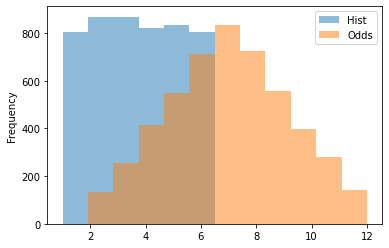

In [125]:
dice = pd.DataFrame(np.random.randint(1,7,5000),columns=["Hist"])

dice["Odds"] = dice["Hist"] + np.random.randint(1,7,5000)
ax = dice.plot.hist(bins = 12,alpha = 0.5)